In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("supermarket_sales_cleaned.csv",index_col=['Invoice ID']) 


In [4]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Date,Time,Payment,Rating
Invoice ID,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,13:08,Ewallet,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29,Cash,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,3/3/2019,13:23,Credit card,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,1/27/2019,20:33,Ewallet,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2/8/2019,10:37,Ewallet,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 750-67-8428 to 849-09-3807
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Total          1000 non-null   float64
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 101.6+ KB


In [6]:
df.isnull().sum()


Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Total            0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64

In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df.describe()


,Unit price,Quantity,Total,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,6.97270
std,26.494628,2.923431,245.885335,1.71858
min,10.080000,1.000000,10.678500,4.00000
25%,32.875000,3.000000,124.422375,5.50000
50%,55.230000,5.000000,253.848000,7.00000
75%,77.935000,8.000000,471.350250,8.50000
max,99.960000,10.000000,1042.650000,10.00000


In [9]:
cat_col=['Branch','City','Customer type','Gender','Product line','Payment']
num_col=['Unit price','Quantity']

In [10]:
X = df[cat_col + num_col]
y = df['Total']

In [11]:
df['Date']=pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.hour

In [12]:
df.columns=df.columns.str.strip()

In [13]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), cat_col),
], remainder='passthrough')

In [14]:
X_processed = preprocessor.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

In [18]:
print("mean_squared_error of model is : ",mse)
print("r2 score of model is : ",r2)

mean_squared_error of model is :  6371.375994653365
r2 score of model is :  90.20677327683285


In [ ]:
grid=GridSearchCV()

In [19]:
sns.set_theme(style="whitegrid")


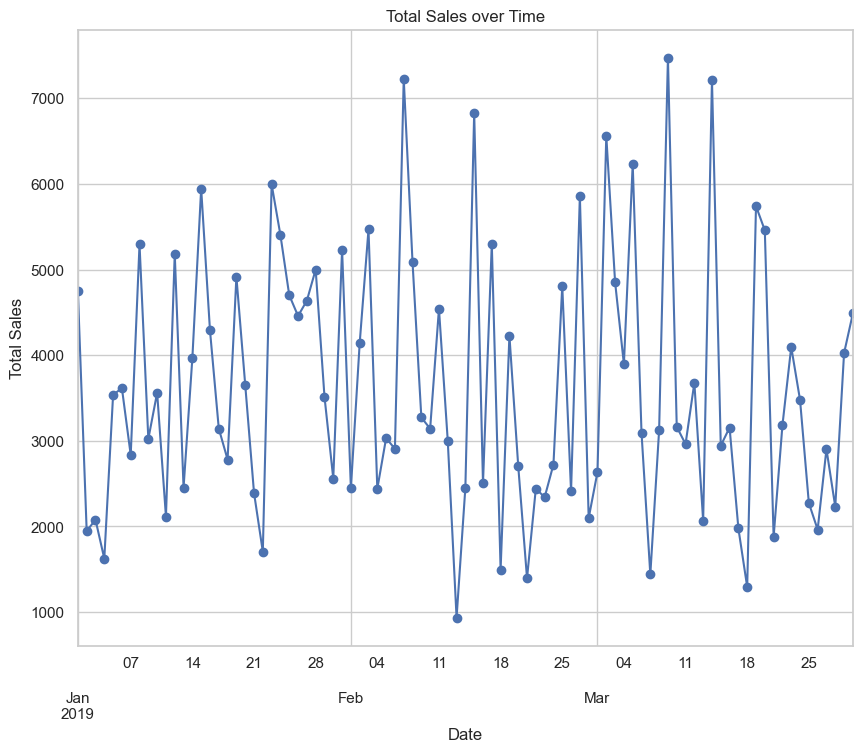

In [20]:
plt.figure(figsize=(10,8))
df.groupby("Date")["Total"].sum().plot(marker="o", color="b", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Total Sales over Time")
plt.show()

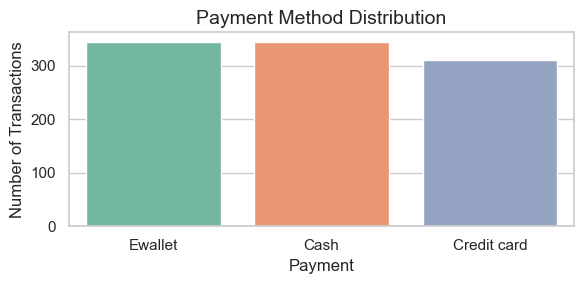

In [21]:
plt.figure(figsize=(6,3)) 
sns.countplot(data=df, x="Payment", palette="Set2")
plt.title("Payment Method Distribution", fontsize=14)
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.show()

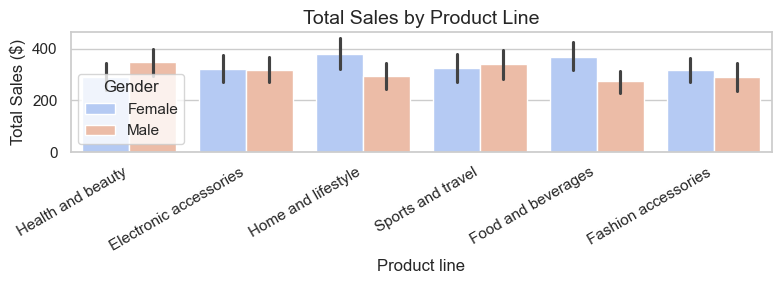

In [32]:
plt.figure(figsize=(8, 3)) 
sns.barplot(data=df, x="Product line", y="Total", hue="Gender", palette="coolwarm")
plt.xticks(rotation=30, ha="right")  
plt.title("Total Sales by Product Line", fontsize=14)
plt.ylabel("Total Sales ($)")

plt.tight_layout()  
plt.show()

